# Imports

In [1]:
# Import libraries
import json
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
sns.set(font_scale=1.2,style="darkgrid")

import plotly.graph_objects as go


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import JSON Data & convert to DF

In [5]:
# Open file with the raw data
file = open('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 1 /Data Visualisation/MTP/data/trending.json', encoding="utf8")
            ## Necessary to change file path line to open file

# Load data as JSON
data = json.load(file)

# Close the original file
file.close()

In [6]:
# Split objects to separate columns and store everything as a dataframe
df = pd.json_normalize(data["collector"])
df_backup = df

In [7]:
df.head()

,id,text,createTime,webVideoUrl,videoUrl,videoUrlNoWaterMark,diggCount,shareCount,playCount,commentCount,...,musicMeta.playUrl,musicMeta.coverThumb,musicMeta.coverMedium,musicMeta.coverLarge,covers.default,covers.origin,covers.dynamic,videoMeta.height,videoMeta.width,videoMeta.duration
0,6907228749016714497,Confidence went 📈,1608214517,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,3710,50,44800,68,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,15
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,55700,1817,838100,936,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,1024,576,11
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,936200,21100,15300000,27100,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,960,540,19
3,6902819837345533186,,1607187987,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,12900,197,94900,143,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,13
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,8805,198,115300,52,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,22


In [9]:
df.to_csv("sample.csv")

### A lot of columns are not required. Let's drop them.

In [8]:
cols = df.columns

In [9]:
cols

Index(['id', 'text', 'createTime', 'webVideoUrl', 'videoUrl',
       'videoUrlNoWaterMark', 'diggCount', 'shareCount', 'playCount',
       'commentCount', 'downloaded', 'mentions', 'hashtags', 'authorMeta.id',
       'authorMeta.secUid', 'authorMeta.name', 'authorMeta.nickName',
       'authorMeta.verified', 'authorMeta.signature', 'authorMeta.avatar',
       'musicMeta.musicId', 'musicMeta.musicName', 'musicMeta.musicAuthor',
       'musicMeta.musicOriginal', 'musicMeta.playUrl', 'musicMeta.coverThumb',
       'musicMeta.coverMedium', 'musicMeta.coverLarge', 'covers.default',
       'covers.origin', 'covers.dynamic', 'videoMeta.height',
       'videoMeta.width', 'videoMeta.duration'],
      dtype='object')

In [10]:
drop = ["text", "createTime", "webVideoUrl", "videoUrl",
       "videoUrlNoWaterMark", "downloaded", "hashtags", "mentions", "authorMeta.id",
       "authorMeta.secUid", "authorMeta.signature", "authorMeta.avatar",
       "musicMeta.musicId", "musicMeta.musicOriginal", "musicMeta.playUrl", "musicMeta.coverThumb",
       "musicMeta.coverMedium", "musicMeta.coverLarge", "covers.default",
       "covers.origin", "covers.dynamic"]

In [11]:
# Drop unrequired columns
df = df.drop(columns=drop,axis=1)

In [12]:
df.head()

,id,diggCount,shareCount,playCount,commentCount,authorMeta.name,authorMeta.nickName,authorMeta.verified,musicMeta.musicName,musicMeta.musicAuthor,videoMeta.height,videoMeta.width,videoMeta.duration
0,6907228749016714497,3710,50,44800,68,ninakleij,Nina,False,Element,Pop Smoke,1024,576,15
1,6875468410612993286,55700,1817,838100,936,joeysofo,JoeySofo,False,Without Me,rapidsongs,1024,576,11
2,6898699405898059010,936200,21100,15300000,27100,jackeyephone,JackJacko,False,Pilfingerdansen - Remix,Sigurd Barrett,960,540,19
3,6902819837345533186,12900,197,94900,143,naomivaneeren,Naomi van eeren ✨,False,Justin Timberlake - Mirrors,Noah,1024,576,13
4,6905635666588192002,8805,198,115300,52,io.dreamer_mk,io. Dreamer,False,原聲,Mj.无名氏,1024,576,22


In [15]:
# Save df to csv file
df.to_csv("clean.csv")

# Analysis 1 - Impact of Artist & Song on Diggs

## Data Preparation 

In [14]:
'''
THIS PLOT IS SOLELY FOR PROTOTYPING. DO NOT GRADE 
'''

fig = px.sunburst(df, path=["musicMeta.musicAuthor","musicMeta.musicName"], values="diggCount")
fig.show()

`We can infer from the above chart that 'Billie Elish' songs get the maximum diggs`

### We can also add an additional layer of 'genre' to this chart. But first we need to join this DF with the 'Apple Music' csv file.

In [17]:
# Import apple data
apple = pd.read_csv("audd_music_apple_music.csv")

In [18]:
apple.head()

,isrc,artistName,url,discNumber,genreNames,durationInMillis,releaseDate,name,albumName,trackNumber,...,artwork.width,artwork.height,artwork.url,artwork.bgColor,artwork.textColor1,artwork.textColor2,artwork.textColor3,artwork.textColor4,playParams.id,playParams.kind
0,USUM72002041,Pop Smoke,https://music.apple.com/us/album/element/14972...,1.0,"['Hip-Hop/Rap', 'Music']",135745.0,2020-02-07,Element,Meet the Woo 2,7.0,...,3000.0,3000.0,https://is2-ssl.mzstatic.com/image/thumb/Music...,fefefe,0b0d10,272828,3b3d3f,525353,1497237918,song
1,DKBKA0201518,Sigurd Barrett,https://music.apple.com/us/album/pilfingerdans...,1.0,"[""Children's Music"", 'Music']",156360.0,1999-01-01,Pilfingerdansen (Remix),Børnesange Fra Sigurds Bjørnetime – Børnemusik...,40.0,...,3000.0,3000.0,https://is5-ssl.mzstatic.com/image/thumb/Music...,990d45,b6eaf6,a6e8fe,b0bed3,a3bcd9,1521489127,song
2,USRC11300246,Justin Timberlake,https://music.apple.com/us/album/mirrors-radio...,1.0,"['Pop', 'Music']",277185.0,2013-02-11,Mirrors (Radio Edit),Mirrors (Radio Edit) - Single,1.0,...,1500.0,1500.0,https://is5-ssl.mzstatic.com/image/thumb/Music...,211c16,ffffff,ddb24e,d2d1d0,b79443,618261614,song
3,GBKQU1777771,Pascal Letoublon,https://music.apple.com/us/album/friendships/1...,1.0,"['House', 'Music', 'Dance']",242016.0,2017-09-05,Friendships,Friendships - Single,1.0,...,1400.0,1400.0,https://is3-ssl.mzstatic.com/image/thumb/Music...,2a9ab8,030709,161616,0b242c,1a3137,1268721227,song
4,GBUM72002531,Sam Smith,https://music.apple.com/us/album/diamonds/1531...,1.0,"['Pop', 'Music']",212097.0,2020-09-19,Diamonds,Love Goes,2.0,...,3000.0,3000.0,https://is4-ssl.mzstatic.com/image/thumb/Music...,010300,efe4c9,cbc542,bfb7a1,a39e35,1531509371,song


In [19]:
# Keep relevant columns
apple = apple[["name","artistName","genreNames"]]

In [20]:
apple.head()

,name,artistName,genreNames
0,Element,Pop Smoke,"['Hip-Hop/Rap', 'Music']"
1,Pilfingerdansen (Remix),Sigurd Barrett,"[""Children's Music"", 'Music']"
2,Mirrors (Radio Edit),Justin Timberlake,"['Pop', 'Music']"
3,Friendships,Pascal Letoublon,"['House', 'Music', 'Dance']"
4,Diamonds,Sam Smith,"['Pop', 'Music']"


In [21]:
# Clean column genreNames
apple["genreNames"] = apple["genreNames"].str.replace("[", "").str.replace("]","").str.replace("Music","").str.replace('"','').str.replace(",","").str.replace("'","")
apple.head()

,name,artistName,genreNames
0,Element,Pop Smoke,Hip-Hop/Rap
1,Pilfingerdansen (Remix),Sigurd Barrett,Childrens
2,Mirrors (Radio Edit),Justin Timberlake,Pop
3,Friendships,Pascal Letoublon,House Dance
4,Diamonds,Sam Smith,Pop


In [22]:
# Join the two DF's on basis of song name and artist (using inner join)
merged_df = df.merge(apple, how="inner", left_on=["musicMeta.musicName", "musicMeta.musicAuthor"], right_on=["name", "artistName"])

In [23]:
merged_df.drop_duplicates(inplace=True)

In [24]:
merged_df.to_csv("combined.csv")

In [25]:
merged_df.head()

,id,diggCount,shareCount,playCount,commentCount,authorMeta.name,authorMeta.nickName,authorMeta.verified,musicMeta.musicName,musicMeta.musicAuthor,videoMeta.height,videoMeta.width,videoMeta.duration,name,artistName,genreNames
0,6907228749016714497,3710,50,44800,68,ninakleij,Nina,False,Element,Pop Smoke,1024,576,15,Element,Pop Smoke,Hip-Hop/Rap
1,6895497835681287426,343000,2846,2800000,2732,the_volleyball_community,Volleyball community,False,Diamonds,Sam Smith,1024,576,29,Diamonds,Sam Smith,Pop
2,6906514963569888513,734,1,8071,54,sulekolik,@Şulekolik,False,Believer,Imagine Dragons,1024,576,15,Believer,Imagine Dragons,Alternative
4,6902751117805899009,2080,17,39300,19,_ylvax,💘 Ylva Bloemsma 💘,False,WITHOUT YOU,The Kid LAROI,1024,576,9,WITHOUT YOU,The Kid LAROI,Hip-Hop/Rap
9,6902733196811635969,4568,21,82700,91,sandro.officialnnl,Sandro Scalia,False,WITHOUT YOU,The Kid LAROI,1024,576,7,WITHOUT YOU,The Kid LAROI,Hip-Hop/Rap


In [26]:
merged_df.fillna("Undefined",inplace=True)

In [27]:
# Find top 5 genres
# Aggregate all genres by diggs
merged_df2 = merged_df.groupby('genreNames')['diggCount'].sum().sort_values(ascending=False)

In [28]:
# Since groupby converted the df into a series; revert the series back into a df
merged_df2 = merged_df2.to_frame().reset_index()

In [29]:
merged_df2.head()

,genreNames,diggCount
0,Hip-Hop/Rap,5799101
1,Pop,849596
2,Alternative,633430
3,Dance,563844
4,Electronic,220234


In [30]:
top5 = merged_df2['genreNames'][:5]

In [31]:
top5_df = merged_df[merged_df['genreNames'].isin(top5)] 

## Chart 1

In [108]:
# Plot figure - interactive
fig = px.sunburst(top5_df, path=["genreNames","artistName","name"],
                  values="diggCount",
                  color="diggCount",
                  color_continuous_scale="Agsunset",
                  title="Most popular TikTok songs",
                  width=700,
                  height=900,
                 )

fig.update_layout(
    font_family="Georgia",
    title_font_family="Georgia",
    title_font_color="gray",
    font=dict(size=20),
    title={
        "y":1,
        "x":0.455,
        "xanchor": "center",
        "yanchor": "top"}
        
)

fig.add_annotation(x=0.52, y=-0.1,
            text="Center: genres, Second layer: artist, Outer layer: song title",
            showarrow=False
            )

# Save figure
#fig.write_image("TikTok sunburst chart.pdf")


fig.show()

`We can infer that Hip-Hop/Rap is the best performing Genre & E-40 the best artist`

# Analysis 2 - Impact of Hashtag on engagement

### Data preparation


- Importing JSON file needed again since hashtags part of the file have to be converted differently

In [15]:
# Open file with the raw data
file = open('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 1 /Data Visualisation/MTP/data/trending.json', encoding="utf8")

# Load data as JSON
raw_data = json.load(file)

# Close the original file
file.close()

# Select only the list with the video data
trending_videos_list = raw_data['collector']

In [16]:
# Create a DataFrame of the data
df_tiktok_dataset = pd.DataFrame(trending_videos_list)

# Let's expand the hashtag cell containing lists to multiple rows
df_tiktok_dataset = df_tiktok_dataset.explode('hashtags').explode('mentions')

In [17]:
def object_to_columns(dfRow, **kwargs):
    '''Function to expand cells containing dictionaries, to columns'''
    for column, prefix in kwargs.items():
        if isinstance(dfRow[column], dict):
            for key, value in dfRow[column].items():
                columnName = '{}.{}'.format(prefix, key)
                dfRow[columnName] = value
    return dfRow

# Expand certain cells containing dictionaries to columns
df_tiktok_dataset = df_tiktok_dataset.apply(object_to_columns, 
                            authorMeta='authorMeta',  
                            musicMeta='musicMeta',
                            covers='cover',
                            videoMeta='videoMeta',
                            hashtags='hashtag', axis = 1)

# Remove the original columns containing the dictionaries
df_tiktok_dataset = df_tiktok_dataset.drop(['authorMeta','musicMeta','covers','videoMeta','hashtags'], axis = 1)
df_tiktok_dataset

,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,cover.default,cover.dynamic,...,musicMeta.playUrl,playCount,shareCount,text,videoMeta.duration,videoMeta.height,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6825540583826768902,ninakleij,Nina,MS4wLjABAAAA1FfFjRMUzr0hX2YPT7pRr7bCPQWa-kU_kV...,don’t tell my instagram I’m here\n19 👸🏼,False,68,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,44800,50,Confidence went 📈,15,1024,576,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,https://www.tiktok.com/@ninakleij/video/690722...
1,https://p16-sign-va.tiktokcdn.com/musically-ma...,6729292817489986566,joeysofo,JoeySofo,MS4wLjABAAAAvkCSTiPWJm7Ctqp7AN3mauS_Bi8tVrbtBg...,Tinder couldn’t help me lose my virginity so I...,False,936,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,838100,1817,Quiet Zone... follow me on insta: joeysofo. Co...,11,1024,576,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,https://www.tiktok.com/@joeysofo/video/6875468...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6798143079889470469,erinwilliams_1,Erin Williams,MS4wLjABAAAAdEeo7qMCWpjEHQIY8SBaOT4g79XSLKQz0l...,International Dressage Rider for GB 🇬🇧 \nIG: @...,False,874,https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/7...,309000,235,"The collab you didn’t know you needed, myself ...",14,1022,576,https://v77.tiktokcdn.com/a6a5e4b4310213520be7...,,https://www.tiktok.com/@erinwilliams_1/video/6...
999,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6798143079889470469,erinwilliams_1,Erin Williams,MS4wLjABAAAAdEeo7qMCWpjEHQIY8SBaOT4g79XSLKQz0l...,International Dressage Rider for GB 🇬🇧 \nIG: @...,False,874,https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/7...,309000,235,"The collab you didn’t know you needed, myself ...",14,102

In [18]:
# Get unique rows from dataset
df_unique_videos = df_tiktok_dataset.drop_duplicates(subset='id', keep="first")

# Show amount of rows per dataset
{
    'df_tiktok_dataset': df_tiktok_dataset.shape,
    'df_unique_videos': df_unique_videos.shape,
}


{'df_tiktok_dataset': (5693, 37), 'df_unique_videos': (1000, 37)}

In [19]:
# Adding new 'total engagement' column
# total engagement = sum of number of likes, comments, shares, views
dflist =["commentCount", "diggCount", "playCount", "shareCount"]
df_unique_videos['totalEngagement']= df_unique_videos[dflist].sum(axis = 1)

In [20]:
# creating a df with only hashtags for easier data manipulation 
data = [df_unique_videos["hashtag.name"], df_unique_videos['totalEngagement']]
headers = ["hashtag.name", "totalEngagement"]
df_hashtag = pd.concat(data, axis=1, keys=headers)
df_hashtag['count'] = 1

#Dropping NA values
df_hashtag = df_hashtag[df_hashtag['hashtag.name'].notna()]

In [21]:
#Creating a pivot table to aggregate data according to the total engagement and count most popular hashtags
table = pd.pivot_table(data=df_hashtag, index=['hashtag.name'],aggfunc={'totalEngagement':np.sum,'count':np.sum})
result = table.sort_values(('totalEngagement'),ascending=False)
'''
the output is a pivot table with 2 headings rows , which impedes the creation of the
intended Treemap plot, as it cannot identify the second heading column, necessary for labels 
'''


'\nthe output is a pivot table with 2 headings rows , which impedes the creation of the\nintended Treemap plot, as it cannot identify the second heading column, necessary for labels \n'

In [22]:
'''
table is then flattened so it can be plotted
'''

flat = pd.DataFrame(result.to_records())
flat


,hashtag.name,count,totalEngagement
0,timewarpscan,4,282879065
1,artchallenge,1,73823100
2,martialarts,1,54632500
3,amazing,1,41932000
4,fyp,112,34761351
...,...,...,...
419,crew07,1,3631
420,magikbijjouslapen,1,3550
421,newtrend,1,2076
422,like,1,1412


### Chart 2

In [23]:
# Defining a custom title / subtitle style
def format_title(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [24]:
fig3 = px.treemap(flat,
                 path = ['count', "hashtag.name"],
                 values = 'totalEngagement', 
                 width=900, height=700,
                 color_continuous_scale= px.colors.sequential.Agsunset,
                 color = "count"
                 )

fig3.data[0].textinfo = 'value+percent root+label'
fig3.update_layout(
    font_family="Georgia",
    title_font_family="Georgia",
    uniformtext=dict(minsize=12, mode='hide'),
    margin = dict(t=50, l=25, r=25, b=25),
    title= format_title("Hashtags that generated the most engagement - Grouped by count", "Data collected from TikTok's top 1000 videos"),
    #root_color="lightgrey"

)

fig3.data[0].hovertemplate = 'Hashtag: %{label}'


fig3.update_traces(
    textposition="middle center", selector=dict(type='treemap'),
    )


fig3.show()

` The treemap shows that the most used hashtags don't necessarily lead to the most engagement`

`Additionally, famous hashtags such as "timewarpscan" sometimes only generate a one-off engagement`

# Analysis-3: Best Time & Video Length to post

### Data preparation

In [25]:
df = df_backup

In [26]:
df.head()

,id,text,createTime,webVideoUrl,videoUrl,videoUrlNoWaterMark,diggCount,shareCount,playCount,commentCount,...,musicMeta.playUrl,musicMeta.coverThumb,musicMeta.coverMedium,musicMeta.coverLarge,covers.default,covers.origin,covers.dynamic,videoMeta.height,videoMeta.width,videoMeta.duration
0,6907228749016714497,Confidence went 📈,1608214517,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,3710,50,44800,68,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,15
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,55700,1817,838100,936,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,1024,576,11
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,936200,21100,15300000,27100,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,960,540,19
3,6902819837345533186,,1607187987,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,12900,197,94900,143,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,13
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,8805,198,115300,52,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,22


In [27]:
# Keep relevant columns
df = df[["createTime","diggCount","videoMeta.duration"]]

In [28]:
df.head()

,createTime,diggCount,videoMeta.duration
0,1608214517,3710,15
1,1600819763,55700,11
2,1606228625,936200,19
3,1607187987,12900,13
4,1607843600,8805,22


In [29]:
#create a bucket for video duration
df["Duration"] = df["videoMeta.duration"].apply(lambda x:"Less than 10" if x<10
                                               else "10 to 20" if x>=10 and x<20 
                                               else "More than 20")

In [30]:
#convert timestamp to date time format
import datetime
df["timestamp"] = pd.to_datetime(df["createTime"],unit="s")
df.head()

,createTime,diggCount,videoMeta.duration,Duration,timestamp
0,1608214517,3710,15,10 to 20,2020-12-17 14:15:17
1,1600819763,55700,11,10 to 20,2020-09-23 00:09:23
2,1606228625,936200,19,10 to 20,2020-11-24 14:37:05
3,1607187987,12900,13,10 to 20,2020-12-05 17:06:27
4,1607843600,8805,22,More than 20,2020-12-13 07:13:20


In [31]:
#extract hour from timestamp
df["Hour"] = df["timestamp"].dt.hour

In [32]:
df.head()

,createTime,diggCount,videoMeta.duration,Duration,timestamp,Hour
0,1608214517,3710,15,10 to 20,2020-12-17 14:15:17,14
1,1600819763,55700,11,10 to 20,2020-09-23 00:09:23,0
2,1606228625,936200,19,10 to 20,2020-11-24 14:37:05,14
3,1607187987,12900,13,10 to 20,2020-12-05 17:06:27,17
4,1607843600,8805,22,More than 20,2020-12-13 07:13:20,7


#### Prototyping chart - not for grading 

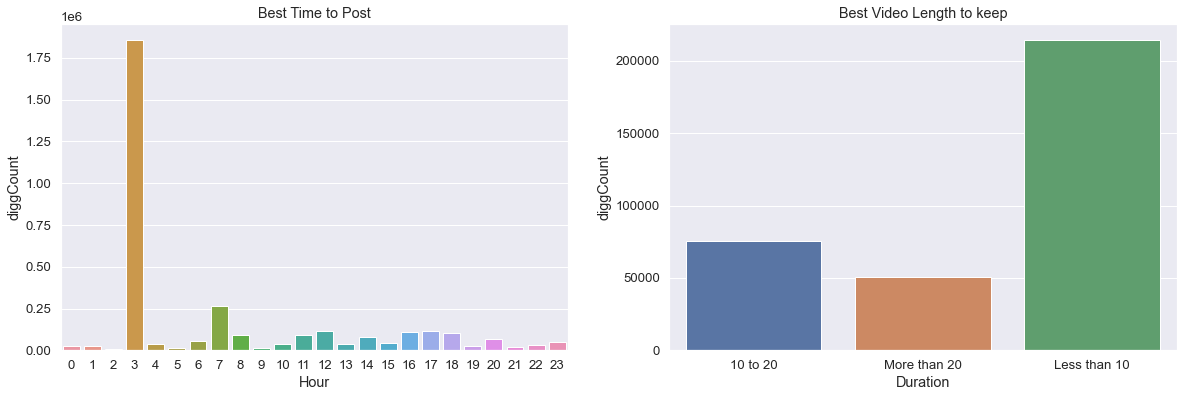

In [33]:
# Plot analysis
'''
THIS PLOT IS SOLELY FOR PROTOTYPING. DO NOT GRADE 
'''

# Set figure size 
plt.figure(figsize=(20, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x="Hour", y="diggCount", data=df, ci=None)
plt.title("Best Time to Post")


# Subplot 2
plt.subplot(1, 2, 2)
sns.barplot(x="Duration", y="diggCount", data=df, ci=None)
plt.title("Best Video Length to keep")

plt.show()


### Chart 3 

In [34]:
# Plot scatterplot
fig = px.scatter(df, y="videoMeta.duration", x="Hour", size="diggCount",
                 color="diggCount",size_max=60,
                category_orders={"Duration in seconds": ["Less than 10", "10 to 20", "More than 20"]},
                title="Duration vs Posting Hour")

fig.update_layout(
    font_family="Georgia",
    title_font_family="Georgia",
    title_font_color="gray",
    xaxis_title="Posting hour",
    yaxis_title="Video length (seconds)",
    font=dict(size=20),
    title={
        "y":0.95,
        "x":0.455,
        "xanchor": "center",
        "yanchor": 'top'}
)

fig.add_annotation(x=2.5, y=20,
            text="Hour=3, Length=9",
            showarrow=True
            )
    
fig.show()

# Save figure
#fig.write_image("TikTok scatter.pdf")